# Heart attack possibility
- write at : 2020.07.09

## Description
### About data set
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

### Attribute Information  
1) age  
2) sex  
3) chest pain type (4 values)  
4) resting blood pressure  
5) serum cholestoral in mg/dl  
6)fasting blood sugar > 120 mg/dl  
7) resting electrocardiographic results (values 0,1,2)  
8) maximum heart rate achieved  
9) exercise induced angina  
10) oldpeak = ST depression induced by exercise relative to rest  
11)the slope of the peak exercise ST segment  
12) number of major vessels (0-3) colored by flourosopy  
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect  
14) target: 0= less chance of heart attack 1= more chance of heart attack  


In [2]:
import pandas as pd
heart_attack_data = pd.read_csv('data/Heart attack possibility/heart.csv')

In [21]:
heart_attack_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


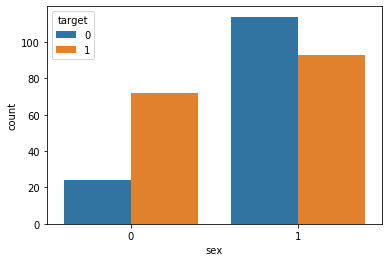

In [35]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex', hue='target', data=heart_attack_data)

In [8]:
heart_attack_data['age_group'] = heart_attack_data['age'].apply(lambda x : x//10)

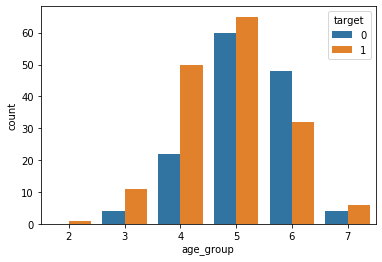

In [36]:
sns.countplot(x='age_group',hue='target',data = heart_attack_data)

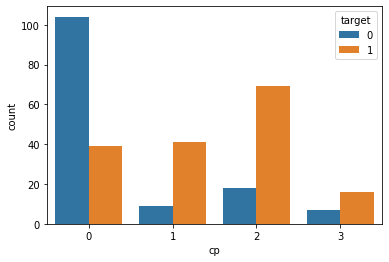

In [37]:
sns.countplot(x='cp',hue='target',data = heart_attack_data)

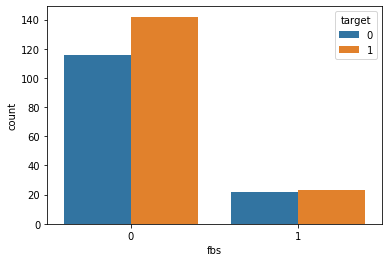

In [38]:
sns.countplot(x='fbs',hue='target',data = heart_attack_data)

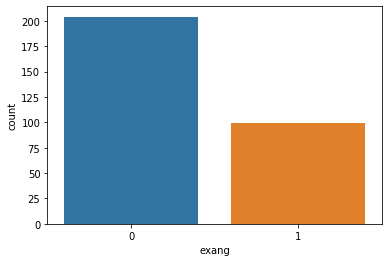

In [29]:
sns.countplot(x='exang',data = heart_attack_data)

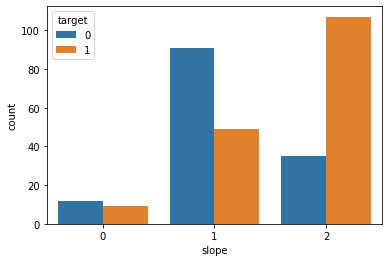

In [32]:
sns.countplot(x='slope', hue='target',data = heart_attack_data)

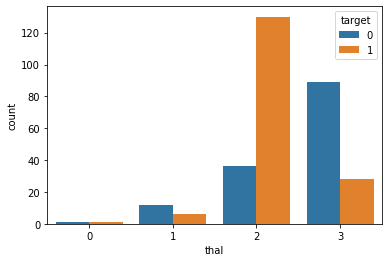

In [34]:
sns.countplot(x='thal', hue='target',data = heart_attack_data)

In [39]:
heart_attack_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,4
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,6
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,5


In [42]:
X = heart_attack_data[['age_group','sex', 'cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [43]:
y = heart_attack_data['target']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr_learner = LogisticRegression()

In [51]:
lr_learner.fit(X_train,y_train)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = lr_learner.predict(X_test)

In [54]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8131868131868132

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[32,  9],
       [ 8, 42]])